In [1]:
# Code for Descriptive Statistics with Direct Download

import pandas as pd
import requests
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import numpy as np
## Chapter 2
# Load the dataset

df = pd.read_csv("cardio.csv")
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
count,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000
mean,49972.410498,19462.667737,1.348625,164.372861,74.100688,126.434924,81.263925,1.363243,1.225174,0.087662,0.053134,0.803548,0.493688,52.823635,27.510513
std,28852.138290,2468.381854,0.476539,8.176756,14.288862,15.961685,9.143985,0.678080,0.571288,0.282805,0.224302,0.397317,0.499964,6.769909,6.026497
min,0.000000,10798.000000,1.000000,55.000000,11.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000,3.471784
25%,24991.000000,17656.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115
50%,50008.000000,19700.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000,26.346494
75%,74878.000000,21323.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.116213
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000,298.666667


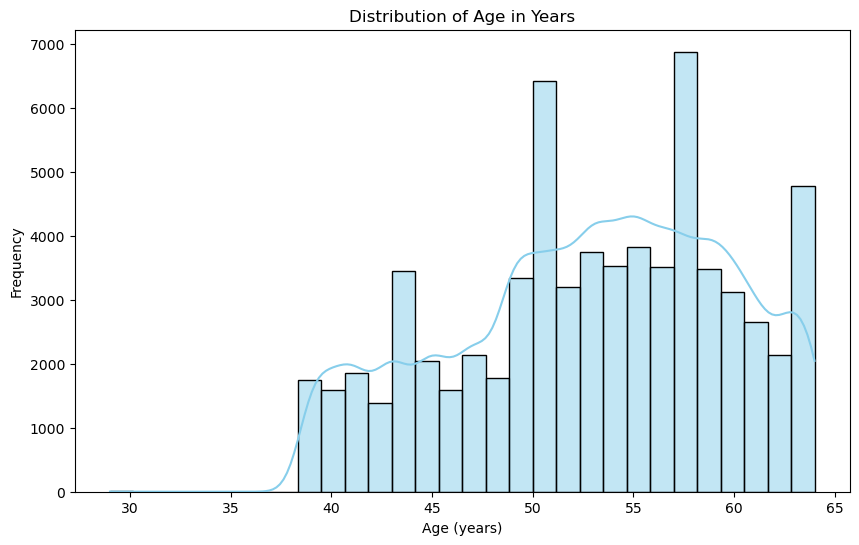

In [2]:
# Code for Age Distribution Visualization

# Set up the plot
plt.figure(figsize=(10, 6))
sns.histplot(df['age_years'], bins=30, kde=True, color='skyblue')

# Add labels and title
plt.title('Distribution of Age in Years')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

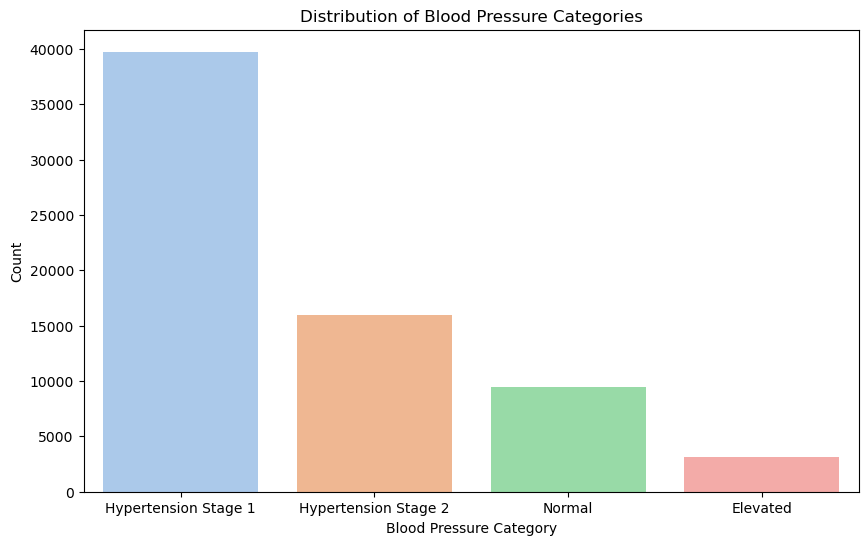

In [3]:
# Code for Blood Pressure Category Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='bp_category', data=df, palette='pastel')

# Add labels and title
plt.title('Distribution of Blood Pressure Categories')
plt.xlabel('Blood Pressure Category')
plt.ylabel('Count')

# Show the plot
plt.show()

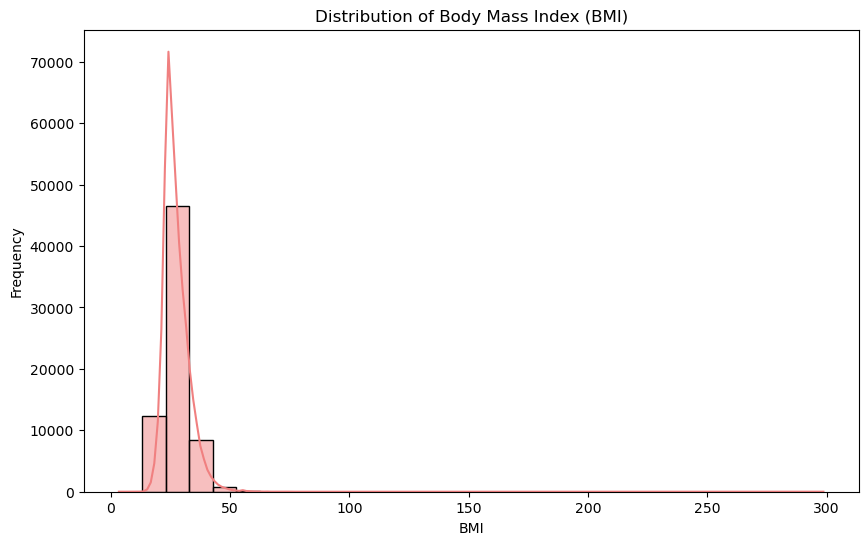

In [4]:
# Code for BMI Distribution Visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['bmi'], bins=30, kde=True, color='lightcoral')

# Add labels and title
plt.title('Distribution of Body Mass Index (BMI)')
plt.xlabel('BMI')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [5]:
###########################################################
#Chapter 3: Data Preparation and Cleaning
###########################################################
# Code for Handling Missing Data
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Drop rows with missing values
df_cleaned = df.dropna()

# Display shape of the cleaned dataset
print("Shape of Cleaned Dataset:", df_cleaned.shape)
# Code for Addressing BMI Outliers
# Set a realistic BMI range
bmi_lower_limit = 10
bmi_upper_limit = 50

# Remove entries with BMI outside the range
df_cleaned = df_cleaned[(df_cleaned['bmi'] >= bmi_lower_limit) & (df_cleaned['bmi'] <= bmi_upper_limit)]

# Display shape of the further cleaned dataset
print("Shape of Further Cleaned Dataset:", df_cleaned.shape)
# Code for Handling Inaccurate Blood Pressure Values
# Set realistic blood pressure ranges
systolic_lower_limit = 80
systolic_upper_limit = 200
diastolic_lower_limit = 40
diastolic_upper_limit = 120

# Remove entries with unrealistic blood pressure values
df_cleaned = df_cleaned[
    (df_cleaned['ap_hi'] >= systolic_lower_limit) & (df_cleaned['ap_hi'] <= systolic_upper_limit) &
    (df_cleaned['ap_lo'] >= diastolic_lower_limit) & (df_cleaned['ap_lo'] <= diastolic_upper_limit)
]

# Display shape of the further cleaned dataset
print("Shape of Further Cleaned Dataset:", df_cleaned.shape)
# Code for Handling Duplicate Entries
# Check for duplicates
duplicates = df_cleaned.duplicated()

# Remove duplicate entries
df_cleaned = df_cleaned[~duplicates]

# Display shape of the final cleaned dataset
print("Shape of Final Cleaned Dataset:", df_cleaned.shape)

Missing Values:
 id                     0
age                    0
gender                 0
height                 0
weight                 0
ap_hi                  0
ap_lo                  0
cholesterol            0
gluc                   0
smoke                  0
alco                   0
active                 0
cardio                 0
age_years              0
bmi                    0
bp_category            0
bp_category_encoded    0
dtype: int64
Shape of Cleaned Dataset: (68205, 17)
Shape of Further Cleaned Dataset: (67972, 17)
Shape of Further Cleaned Dataset: (67972, 17)
Shape of Final Cleaned Dataset: (67972, 17)


/Users/nisar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nisar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nisar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nisar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

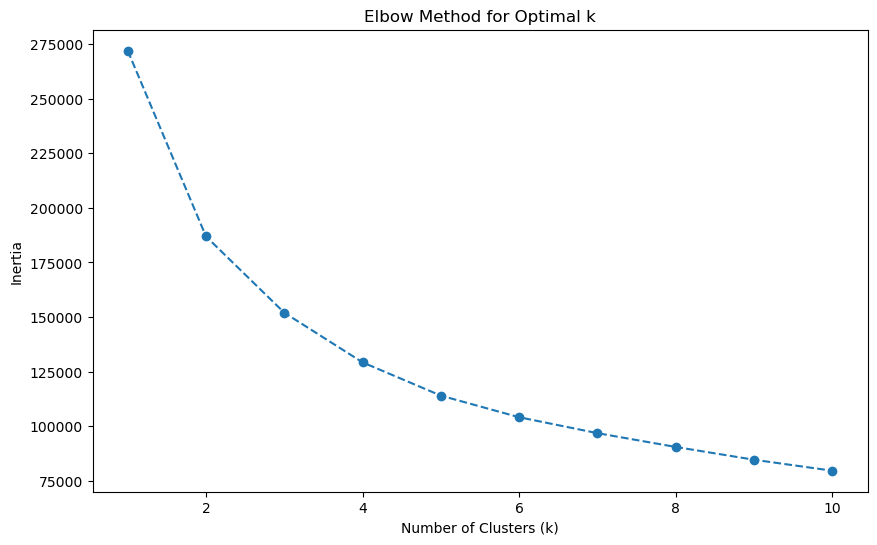

In [6]:
###########################################################
#Chapter 4: UNSUPERVISED ANALYSIS
###########################################################
# Code for K-Means Clustering

# Selecting features for clustering
features_for_clustering = ['age_years', 'bmi', 'ap_hi', 'ap_lo']

# Standardizing the features
df_standardized = (df_cleaned[features_for_clustering] - df_cleaned[features_for_clustering].mean()) / df_cleaned[features_for_clustering].std()

# Determining optimal number of clusters (k) using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_standardized)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [7]:
# Fitting K-Means with optimal k
kmeans_optimal = KMeans(n_clusters=3, random_state=42)
df_cleaned['cluster_kmeans'] = kmeans_optimal.fit_predict(df_standardized)
# Code for Cluster Profiles
cluster_profiles = df_cleaned.groupby('cluster_kmeans')[features_for_clustering].mean()
print("Cluster Profiles (K-Means):\n", cluster_profiles)

/Users/nisar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Profiles (K-Means):
                 age_years        bmi       ap_hi      ap_lo
cluster_kmeans                                             
0               45.673670  25.577421  115.963301  75.755453
1               57.275215  26.705143  121.029850  78.410633
2               54.358306  30.290136  145.506385  91.305982


### Selecting a random subset of the data which should reduce the computational load.

/Users/nisar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


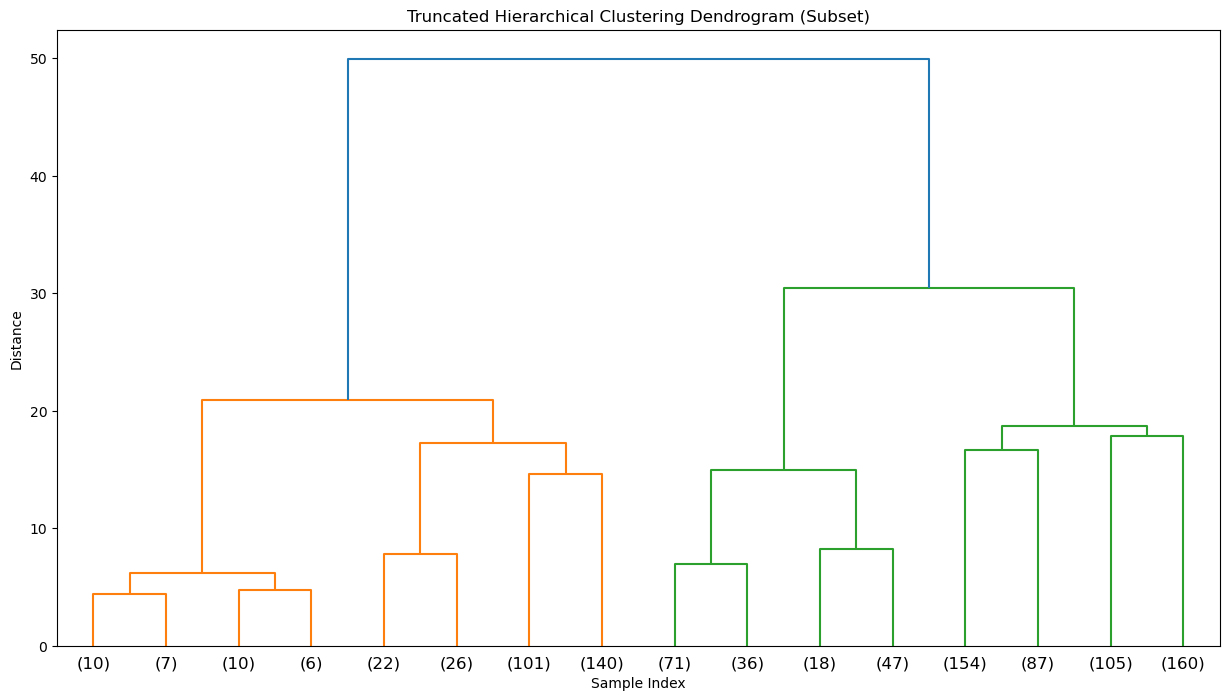

In [8]:
# Code for Hierarchical Clustering with a Subset of Data
subset_size = 1000  # You can change this to a smaller number based on your requirements
subset_indices = np.random.choice(df_standardized.index, size=subset_size, replace=False)
df_subset = df_standardized.loc[subset_indices]

# Using AgglomerativeClustering on the subset
hierarchical_optimal_subset = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean')
df_cleaned_subset = df_cleaned.loc[subset_indices].copy()
df_cleaned_subset['cluster_hierarchical'] = hierarchical_optimal_subset.fit_predict(df_subset)

# Plotting the dendrogram for the subset
linkage_matrix_subset = linkage(df_subset, method='ward', metric='euclidean')
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix_subset, truncate_mode='level', p=3)  # Adjust 'p' based on your preference
plt.title('Truncated Hierarchical Clustering Dendrogram (Subset)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [9]:
# Code for Assigning Hierarchical Clusters with Subset

# Select a random subset of the data (adjust the subset size as needed)
subset_size = 1000  # You can change this to a smaller number based on your requirements
subset_indices = np.random.choice(df_standardized.index, size=subset_size, replace=False)
df_subset = df_standardized.loc[subset_indices]

# Using AgglomerativeClustering on the subset
hierarchical_optimal_subset = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean')
df_cleaned_subset = df_cleaned.loc[subset_indices].copy()
df_cleaned_subset['cluster_hierarchical'] = hierarchical_optimal_subset.fit_predict(df_subset)

# Assigning the clusters to the entire dataset based on the optimal clusters from the subset
df_cleaned['cluster_hierarchical'] = df_cleaned_subset['cluster_hierarchical']


/Users/nisar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [10]:
# Code for Hierarchical Cluster Profiles
cluster_profiles_hierarchical = df_cleaned.groupby('cluster_hierarchical')[features_for_clustering].mean()
print("Cluster Profiles (Hierarchical):\n", cluster_profiles_hierarchical)

Cluster Profiles (Hierarchical):
                       age_years        bmi       ap_hi      ap_lo
cluster_hierarchical                                             
0.0                   47.579677  25.069042  120.436490  76.812933
1.0                   56.487805  29.039738  146.707317  93.282927
2.0                   56.389503  28.653215  122.966851  79.621547


In [11]:
###########################################################
# Chapter 5: SUPERVISED ANALYSIS
###########################################################
# Code for Linear Regression with Train-Test Split

# Selecting features and target variable
features_for_regression = ['age_years', 'bmi', 'ap_hi', 'ap_lo']
target_variable = 'cardio'

# Splitting the data into training and testing sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(df_cleaned[features_for_regression], df_cleaned[target_variable], test_size=0.3, random_state=42)

# Initializing and fitting the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_linear = linear_model.predict(X_test)

# Evaluating the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Print evaluation metrics
print("Linear Regression Evaluation:")
print("Mean Squared Error:", mse_linear)
print("R-squared:", r2_linear)

Linear Regression Evaluation:
Mean Squared Error: 0.19637719620849609
R-squared: 0.21438420020975846


In [12]:
# Code for Logistic Regression with Train-Test Split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Selecting features and target variable
features_for_logistic = ['age_years', 'bmi', 'ap_hi', 'ap_lo', 'cluster_kmeans']
target_variable_logistic = 'cardio'

# Splitting the data into training and testing sets (70/30 split)
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(df_cleaned[features_for_logistic], df_cleaned[target_variable_logistic], test_size=0.3, random_state=42)

# Initializing and fitting the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_logistic, y_train_logistic)

# Making predictions on the test set
y_pred_logistic = logistic_model.predict(X_test_logistic)

# Evaluating the model
accuracy_logistic = accuracy_score(y_test_logistic, y_pred_logistic)
confusion_matrix_logistic = confusion_matrix(y_test_logistic, y_pred_logistic)
classification_report_logistic = classification_report(y_test_logistic, y_pred_logistic)

# Print evaluation metrics
print("Logistic Regression Evaluation:")
print("Accuracy:", accuracy_logistic)
print("Confusion Matrix:\n", confusion_matrix_logistic)
print("Classification Report:\n", classification_report_logistic)

Logistic Regression Evaluation:
Accuracy: 0.7127795213809337
Confusion Matrix:
 [[8129 2186]
 [3671 6406]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.79      0.74     10315
           1       0.75      0.64      0.69     10077

    accuracy                           0.71     20392
   macro avg       0.72      0.71      0.71     20392
weighted avg       0.72      0.71      0.71     20392

